In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# assume some unit gaussian 10-D input data

D = np.random.randn(1000, 5000)
hidden_layer_sizes = [500] * 10
nonlinerities = ['tanh'] * len(hidden_layer_sizes)


In [17]:
act = {'relu': lambda x: np.maximum(0, x), 
       'tanh': lambda x: np.tanh(x)}
Hs = {}
for i in range(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in)
    
    H = np.dot(X, W)
    H = act[nonlinerities[i]](H)
    Hs[i] = H

input layer had mean -0.000298 and std 1.000120
hidden layer 1 had mean 0.000960 and std 0.627826
hidden layer 2 had mean 0.000476 and std 0.486058
hidden layer 3 had mean -0.000089 and std 0.407734
hidden layer 4 had mean -0.000255 and std 0.356812
hidden layer 5 had mean 0.000171 and std 0.321499
hidden layer 6 had mean -0.000029 and std 0.293681
hidden layer 7 had mean -0.000163 and std 0.273753
hidden layer 8 had mean 0.000028 and std 0.255570
hidden layer 9 had mean 0.000084 and std 0.240112
hidden layer 10 had mean -0.000062 and std 0.226380


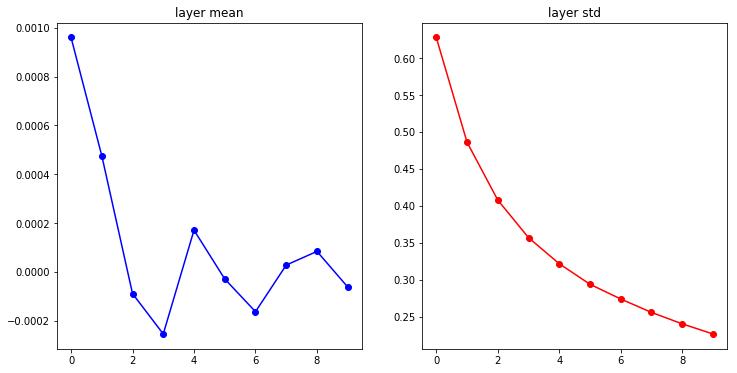

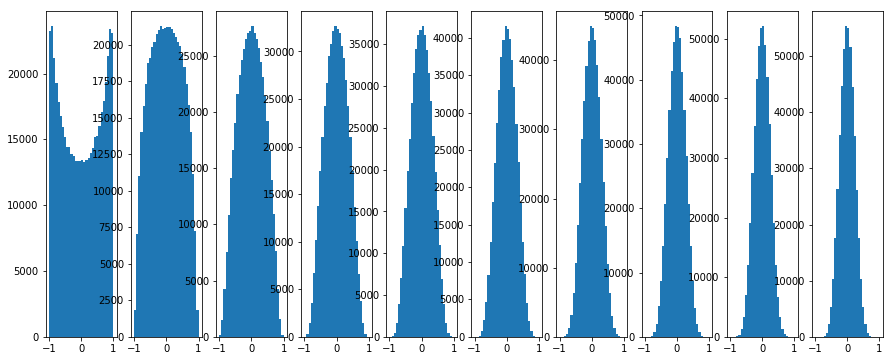

In [19]:
# look at distributions at each layer
print("input layer had mean %f and std %f" % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.items()]
layer_stds = [np.std(H) for i, H in Hs.items()]
for i, H in Hs.items():
    print("hidden layer %d had mean %f and std %f" % (i+1, layer_means[i], layer_stds[i]))
    
# plot the means and std
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, "ob-")
plt.title("layer mean")
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, "or-")
plt.title("layer std")

# plot raw distributions
plt.figure(figsize=(15,6))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1,1))